In [1]:
import numpy as np
import scipy as sp
from scipy.misc import derivative 
from scipy import sparse
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
a = 0
b = 1
h = (b - a) / 150
ua = 0
ub = 0

In [3]:
def A(x, k1, k2, k3, xr1, xr2):
    if x < xr1:
        return k1
    elif x-h < xr1 < x:
        return h / ((xr1 - x + h) / k1 + (x - xr1) / k2)
    elif x <= xr2:
        return k2
    elif x-h < xr2 < x:
        return h / ((xr2 - x + h) / k2 + (x - xr2) / k3)
    else:
        return k3   

In [4]:
def B(x, k1, k2, k3, xr1, xr2):
    if x < xr1:
        return k1
    elif x < xr1 < x+h:
        return h / ((xr1 - x) / k1 + (x+h - xr1) / k2)
    elif x+h <= xr2:
        return k2
    elif x < xr2 < x+h:
        return h / ((xr2 - x) / k2 + (x+h - xr2) / k3)
    else:
        return k3

In [5]:
def phi(x, x0, C):
    if abs(x - x0) - h/2 < 1e-5:
        return C/2
    elif x - h/2 < x0 < x + h/2:
        return C
    else:
        return 0

In [18]:
def solve2(a, b, ua, ub, h, k1, k2, k3, xr1, xr2, phi_conds):
    n = int((b - a) / h) + 1
    M = np.zeros(shape=(n, n))
    Y = np.zeros(n)
    M[0, 0] = 1
    M[-1, -1] = 1
    Y[0] = ua
    Y[-1] = ub
    for i in range(1, n - 1):
        xi = a + h * i
        M[i, i - 1] = A(xi, k1, k2, k3, xr1, xr2)
        M[i, i] = -(A(xi, k1, k2, k3, xr1, xr2) + B(xi, k1, k2, k3, xr1, xr2))
        M[i, i + 1] = B(xi, k1, k2, k3, xr1, xr2)
        Y[i] = - h* sum(phi(xi, x0, C) for x0, C in phi_conds)
    return np.linspace(a, b, n), np.linalg.solve(M, Y)

In [7]:
sets = [
    [1, 100, 0, (b + a)/2, 2*b],
    [100, 1, 0, (b + a)/2, 2*b],
    [10, 25, 75, a + (b - a)/3, a + 2*(b - a)/3],
    [100, 40, 15, a + (b - a)/3, a + 2*(b - a)/3],
    [30, 60 , 30, a + (b - a)/3, a + 2*(b - a)/3],
    [100, 5, 100, a + (b - a)/3, a + 2*(b - a)/3]
]

conditions = [
    [((b + a)/2, 20)],
    [((b + a)*(0.5 - 0.3), 20), ((b + a)*(0.5 + 0.3), 20)],
    [((b + a)*(0.5 - 0.3), 20), ((b + a)*(0.5 + 0.3), 200)]
]

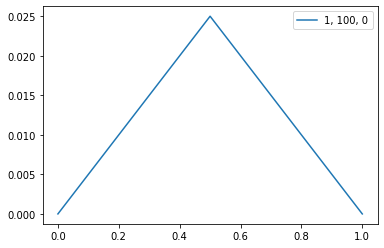

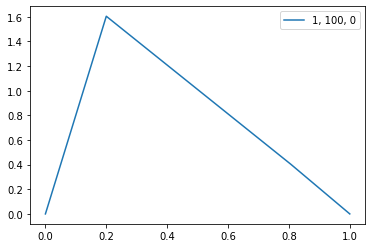

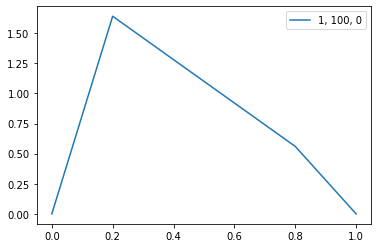

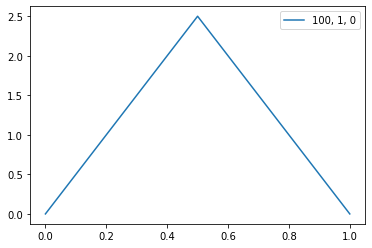

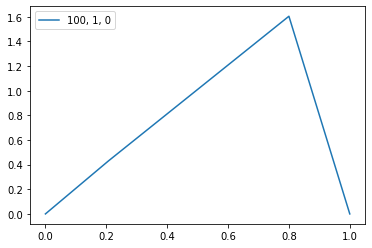

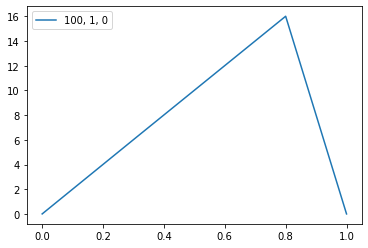

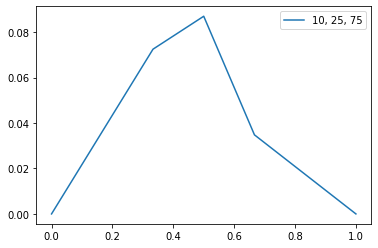

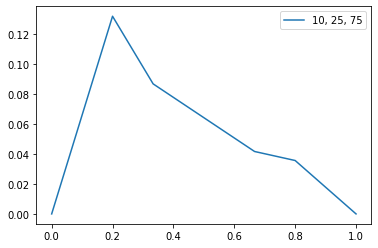

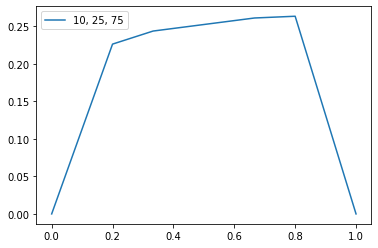

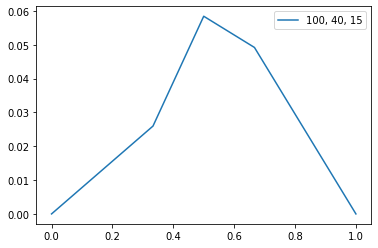

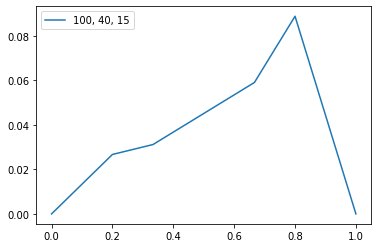

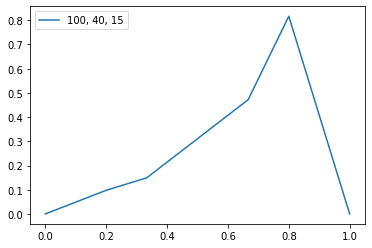

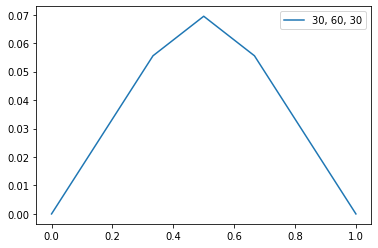

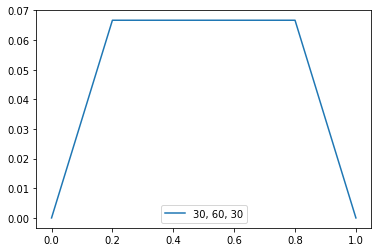

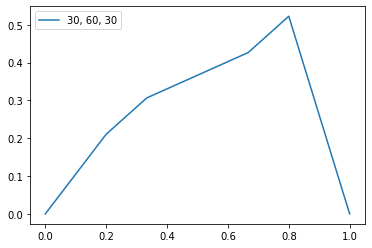

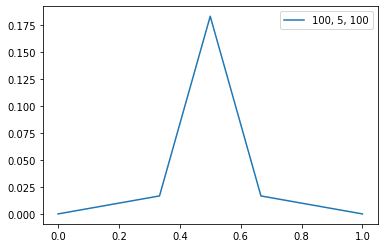

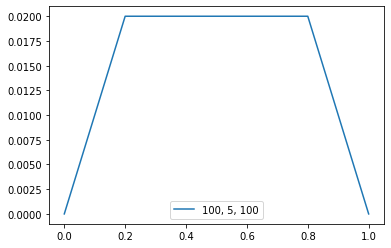

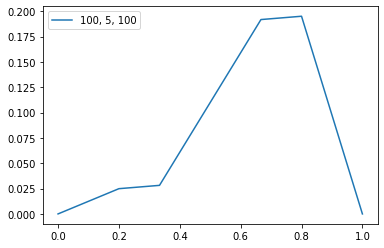

In [8]:
for s in sets:
    for conds in conditions:
        plt.plot(*solve2(a, b, ua, ub, h, *s, conds), label='{}, {}, {}'.format(*s))
        plt.plot()
        plt.legend()
        plt.show()

In [8]:
print("task3")

task3


In [19]:
a = 0.1
b = 0.8
ua = lambda t: 6
ub = lambda t: 0.6
k = lambda x: x 
f = lambda x: x + x ** (1/3)
phi = lambda x:80*x**2-132*x+44.2
h = 0.05
t = 0.001
K = int((b - a)/h) + 1
T = 5000

In [20]:
def solve3():
    M = np.zeros(shape=(T, K))
    M[:,0] = np.array([ua(i) for i in np.linspace(0, T, T)])
    M[:,-1] = np.array([ub(i) for i in np.linspace(0, T, T)])
    M[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, K)])    
    for i in range(1, T):
        for j in range(1, K-1):
            xj = a + j*h
            M[i][j] = k(xj + h/2)*M[i-1][j+1]*t/(h*h) + \
                      (1 - (k(xj + h/2) + k(xj - h/2))*t/(h*h)) * M[i-1][j] + \
                      k(xj - h/2)*M[i-1][j-1]*t/(h*h) + \
                      t*f(xj)*(1 - np.exp(-i*t))
    return M

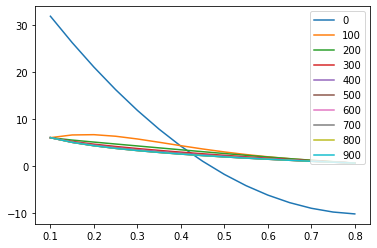

In [21]:
matrix = solve3()
X = np.linspace(a, b, K)

for i in range(0, 1000, 100):
    plt.plot(X, matrix[i], label=i)
plt.legend()
plt.show()

In [11]:
print("task4")

task4


In [22]:
a = -1
b = 1
ua = lambda t: 0
ub = lambda t: 0
k = 0.5
f = lambda x: x
phi = lambda x: 1 - x*x
h = (b - a) / 50
t = 0.5 * h*h /k
T = 0.4
nK = int((b - a)/h) + 1
nT = int(T/t)+1

In [23]:
def solve4():
    M = np.zeros(shape=(nT, nK))
    M[:,0] = np.array([ua(i) for i in np.linspace(0, T, nT)])
    M[:,-1] = np.array([ub(i) for i in np.linspace(0, T, nT)])
    M[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, nK)])    
    for i in range(1, nT):
        for j in range(1, nK-1):
            xj = a + j*h
            M[i][j] = k * M[i-1][j+1]*t/(h*h) + \
                      (1 - 2*k*t/(h*h)) * M[i-1][j] + \
                      k*M[i-1][j-1]*t/(h*h) + \
                      t*f(xj)
    return M

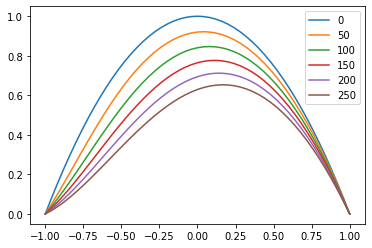

In [24]:
matrix = solve4()
X = np.linspace(a, b, nK)

for i in range(0, nT, 50):
    plt.plot(X, matrix[i], label=i)
plt.legend()
plt.show()